In [70]:
import xarray as xr
import sys
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('/ocean/vvalenzuela/MOAD/Ocean_Parcels')
import statistics
from scipy import stats
from OP_functions import *
import cmocean
cmap = cmocean.cm.haline

From Sun et al. 2023 we obtain a partitioning relation of PBDEs between dissolved and particulate states:



$K_{oc,a} = [PBDE]_p / ([PBDE]_{d,c} \cdot [POC])$

Where:

- $[PBDE]_p$ represents the PBDEs concentration retained on the filter.

- $[PBDE]_{d,c}$ is the PBDEs concentrations pasing through the filter.

- $[POC]$ is the Particulate Organic Carbon.

We can use this parameter in Ocean Parcels for changing states between colloids and particuated PBDEs coming out of the pipe.


Option 1: Use the discharge data for PBDEs and use it with the POC data for a modified version of the equation above.

In [2]:
PBDE_data = pd.read_excel('/ocean/vvalenzuela/MOAD/analysis-vicente/PBDEs_DATA/predicted_discharges.xlsx')
time = PBDE_data['Unnamed: 0'].values
PBDE_data = PBDE_data.drop('Unnamed: 0', axis=1)
PBDE_data = PBDE_data.set_index(time)

In [3]:
hourly_discharge = pd.DataFrame(columns=['PBDE 28', 'PBDE 99', 'PBDE 209'])
for pbde in ['PBDE 28', 'PBDE 99', 'PBDE 209']:
    hourly_discharge[pbde] = pd.to_numeric(PBDE_data[pbde], errors='coerce').resample("1h").interpolate("linear")

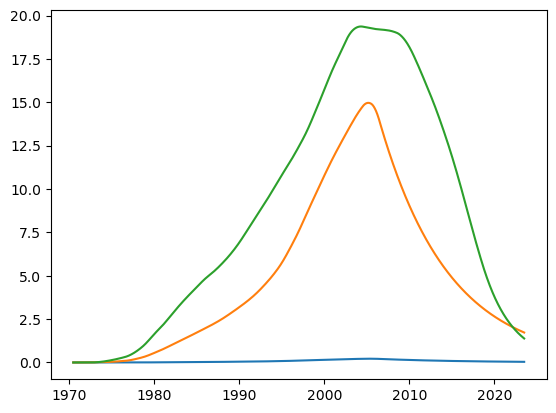

In [4]:
plt.plot(hourly_discharge)

In [58]:
bio = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/12jul23/SalishSea_1h_20230712_20230712_biol_T.nc')

In [59]:
jjii = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/grid_from_lat_lon_mask999.nc')
def finder(lati,loni):
    j = [jjii.jj.sel(lats=lati, lons=loni, method='nearest').item()][0]
    i = [jjii.ii.sel(lats=lati, lons=loni, method='nearest').item()][0]
    return j,i

In [26]:
clat = [49.2]
clon = [-123.4]
#
a, b = finder(clat[0], clon[0])

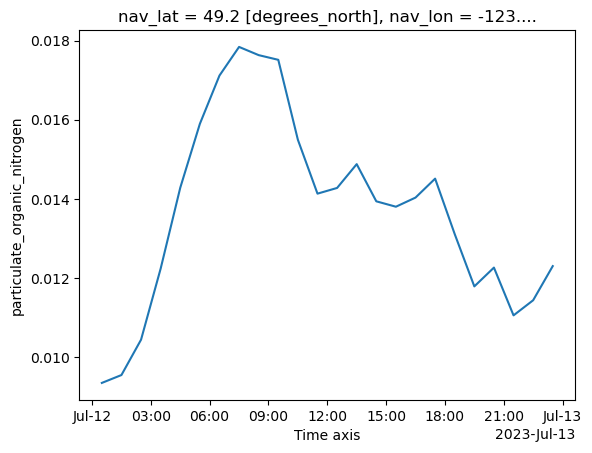

In [60]:
(bio['particulate_organic_nitrogen'][:,0,a,b]*(16/106)).plot()

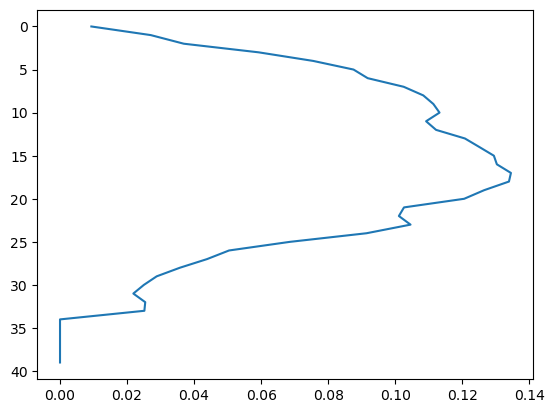

In [61]:
plt.plot(bio['particulate_organic_nitrogen'][0,:,a,b]*(16/106), np.arange(0,len(bio['particulate_organic_nitrogen'][0,:,0,0])))
plt.gca().invert_yaxis()


In [78]:
np.mean(bio['particulate_organic_nitrogen'][0,:,:,:]*(16/106), axis=0)

<xarray.DataArray 'particulate_organic_nitrogen' (y: 898, x: 398)> Size: 1MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    nav_lat        (y, x) float32 1MB ...
    nav_lon        (y, x) float32 1MB ...
    time_centered  datetime64[ns] 8B ...
    time_counter   datetime64[ns] 8B 2023-07-12T00:30:00
Dimensions without coordinates: y, x

In [63]:
POC = bio['particulate_organic_nitrogen']*(16/106)
coords = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')

In [83]:
poc_mean = np.mean(bio['particulate_organic_nitrogen'][:,:,:,:]*(16/106), axis=1)

Text(0.5, 1.0, 'POC mean along the depth at 2023-07-12T10:30:00.000000000')

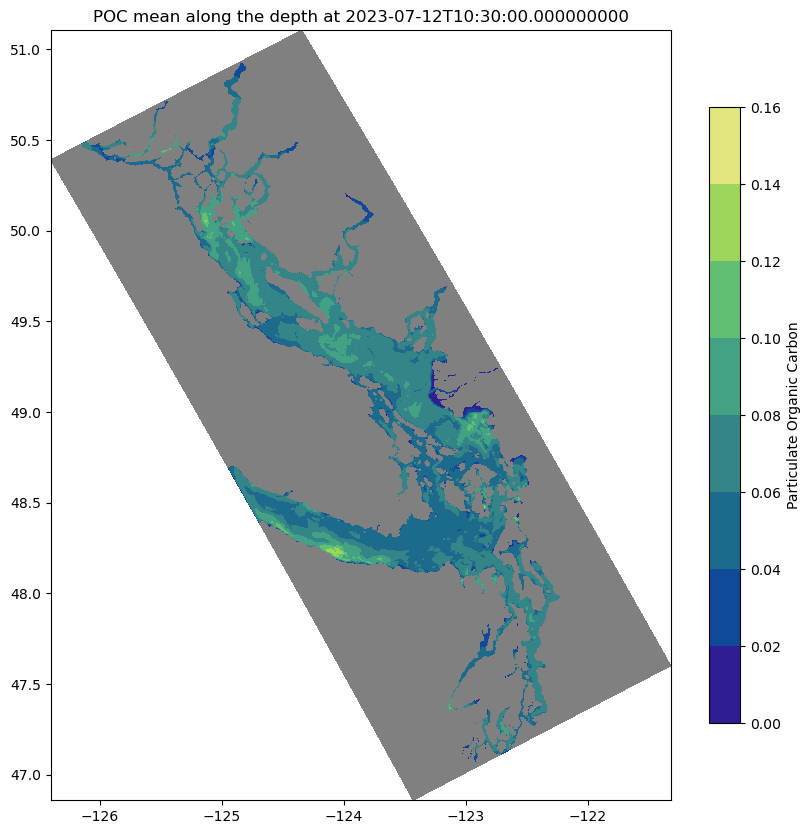

In [87]:
t = 10
fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(coords.nav_lon, coords.nav_lat, mask.umask[0,0,:,:],zorder=2,cmap='gray',levels=[-1,0])
poc = ax.contourf(coords.nav_lon, coords.nav_lat, poc_mean[t,:,:],cmap=cmap)
cbar = fig.colorbar(poc, ax=ax, location='right', shrink=0.8)
cbar.set_label('Particulate Organic Carbon')
ax.set_title('POC mean along the depth at ' + str(POC['time_counter'][t].values))